#House price prediction data set- Linear Regression
Consisting of 4600 entries for homes in different US cities, this dataset includes 18 different variables that describe various property details such as size and location characteristics.
- Need to build a model which can able to predict house prices based on the other factors



In [624]:
import pandas as pd  #import require liab.
import numpy as np  # as is alias which help to give a nickname
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#importing scikit-learn --user
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

In [625]:
#loading data by help of pandas
df=pd.read_csv("/content/Housing (1).csv")
#checking the shape and lenght of data
df.shape,len(df)

((545, 13), 545)

Columns or Features Description
- 'price': The price of the house (target variable).
- 'area': The area or size of the house in square feet.
- 'bedrooms': The number of bedrooms in the house.
- 'bathrooms': The number of bathrooms in the house.
- 'stories': The number of stories or floors in the house.
- 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
- 'guestroom': Categorical variable indicating whether the house has a guest room or not.
- 'basement': Categorical variable indicating whether the house has a basement or not.
- 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
- 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
- 'parking': The number of parking spaces available with the house.
- 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
- 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).


**So in this data it has total 13 atributes/No. of columns & 545 rows**

###Data Understanding

In [626]:
#Chekcing first 5 row's
df.head()  #Head function by default it return 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [627]:
#Checking  last 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [628]:
#Random checking
df.sample(5)   #We can check multiple index position by help of sample

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
204,4900000,4770,3,1,1,yes,yes,yes,no,no,0,no,semi-furnished
368,3675000,5640,2,1,1,no,no,no,no,no,0,no,semi-furnished
101,6230000,5500,3,1,3,yes,no,no,no,no,1,yes,unfurnished
246,4550000,3520,3,1,1,yes,no,no,no,no,0,yes,semi-furnished
159,5460000,3150,3,2,1,yes,yes,yes,no,yes,0,no,furnished


In [629]:
#Checking informations
df.info(),len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(None, 545)

**We can see there are no null values as all attributes has same lenght, but will check further**

In [630]:
#Statistical info for numerical columns or Descriptive statistics
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


1. So hear we get count,mean, standard daviation,minimum, maximum which is 5 point statistics.
2. Also we get quantiles at 25% ,50% & 75 %
3. It descibe the central tendancy of dataset with dispersion.

In [631]:
#for categorical columns
df.describe(include="O")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


1, It shows the total counts of each row & the unique values they have with mode value

**Lets seperate categoriical and numerical columns**

In [632]:
List_of_categorical_columns=[['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus']]



List_of_numerical_columns=[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]


List_of_total_columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']    #Total attributes

df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


1. But we can see that it has only two pure numerical columns.
2. Columns like 'bedrooms', 'bathrooms', 'stories', 'parking' are psudo numerical columns.

#EDA
Above thats all about the data : now ,i can start exploratory data analysis

###Checking column "price" & for "Area"
1. We can check distributions & central tendencies ,
2. How the data ponts are spreaded
2. Skewness,

<ipython-input-633-ac3efac28dee>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.price,shade=True)


Level of skewness for price columns 1.2122388370279802
Variance for price columns 3498544355820.573
S.T.D. for price columns 1870439.6156573922


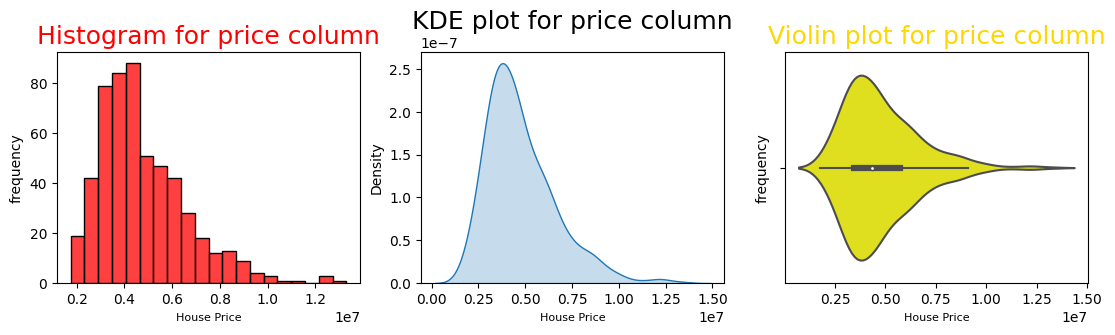

In [633]:
#For area
plt.figure(figsize=(18,3))
#Histogram
plt.subplot(1, 4, 1)
plt.title("Histogram for price column",size=18,color="red")
sns.histplot(x=df.price,bins=20,color="red")
plt.xlabel("House Price",size=8)
plt.ylabel("frequency")
#Kde plot
plt.subplot(1, 4, 2)
plt.title("KDE plot for price column",size=18)
plt.xlabel("House Price",size=8)
sns.kdeplot(x=df.price,shade=True)
#Violin plot
plt.subplot(1, 4, 3)
plt.title("Violin plot for price column",size=18,color="gold")
sns.violinplot(x=df.price,color="yellow")
plt.xlabel("House Price",size=8)
plt.ylabel("frequency")


#Central tendencies
print("Level of skewness for price columns",df.price.skew())  #Checking curve direction
print("Variance for price columns",df.price.var())
print("S.T.D. for price columns",df.price.std())  #Standard daviation

Price Column has a un-symmetrical distribution with right skewed of 1.21 which is not in between -0.5 and 0.5 .
- Most of the house prices lies b/w 0.25M doll. to 0.50M doll.
- Prices has extreme values towards its higher values.

<ipython-input-634-dfc89bb5befd>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.area,shade=True)


Level of skewness for area columns 1.321188343153483
Variance for areacolumns 4709512.057575554
Mean for area columns 5150.54128440367


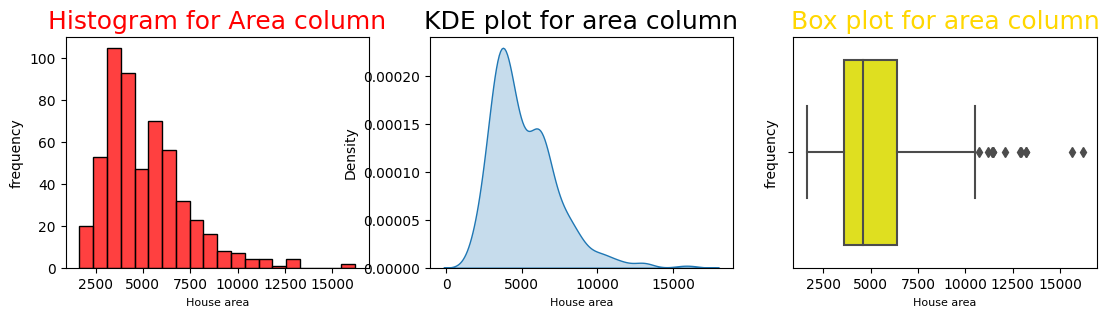

In [634]:
#Similerly for  of house
plt.figure(figsize=(18,3))
#Histogram
plt.subplot(1, 4, 1)
plt.title("Histogram for Area column",size=18,color="red")
sns.histplot(x=df.area,bins=20,color="red")
plt.xlabel("House area",size=8)
plt.ylabel("frequency")
#Kde plot
plt.subplot(1, 4, 2)
plt.title("KDE plot for area column",size=18)
plt.xlabel("House area",size=8)
sns.kdeplot(x=df.area,shade=True)
#Box plot
plt.subplot(1, 4, 3)
plt.title("Box plot for area column",size=18,color="gold")
sns.boxplot(x=df.area,color="yellow")
plt.xlabel("House area",size=8)
plt.ylabel("frequency")


#Central tendencies
print("Level of skewness for area columns",df.area.skew())  #Checking curve direction for area column
print("Variance for areacolumns",df.area.var())
print("Mean for area columns",df.area.mean())  #Standard daviation

Area column is also un-symmetrical in nature and not making Gaussian curve with skewness value 1.32.
- We can see Density curve is centred around mean value  5150.54.
- Similerly most of Houses have area around b/w 2500 & 6000 sq. ft. .

# Checking categorical columns

###Lets calculate the unique values for categorical columns

In [635]:
unique_df = df.select_dtypes(exclude=['int', 'float'])
for i in unique_df.columns:
    print(unique_df[i].unique()) # to print categories name only
    print(unique_df[i].value_counts()) # to print count of each category

['yes' 'no']
yes    468
no      77
Name: mainroad, dtype: int64
['no' 'yes']
no     448
yes     97
Name: guestroom, dtype: int64
['no' 'yes']
no     354
yes    191
Name: basement, dtype: int64
['no' 'yes']
no     520
yes     25
Name: hotwaterheating, dtype: int64
['yes' 'no']
no     373
yes    172
Name: airconditioning, dtype: int64
['yes' 'no']
no     417
yes    128
Name: prefarea, dtype: int64
['furnished' 'semi-furnished' 'unfurnished']
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


1. So we can see that all the columns has two unique values,means has only yes or no statement.
2. Only furnishing status has something different it has three unique values semi-furnished unfurnished & furnished. Which can define the class of the house and we can see that it is some ordinal form.

###So lets check furnishing status of houses

total number of unique values are : 3 which are : 
['furnished' 'semi-furnished' 'unfurnished']
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


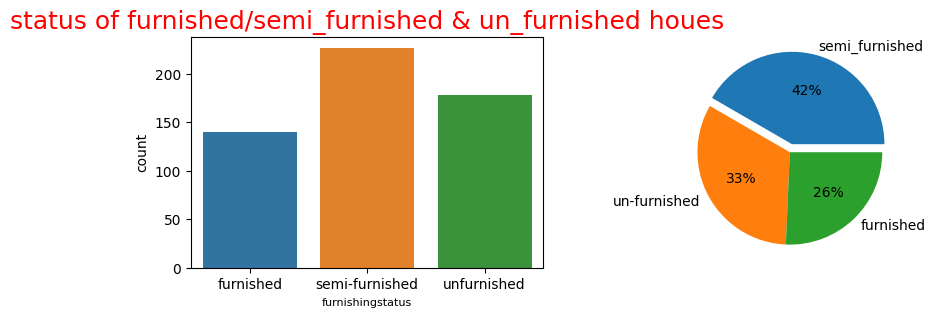

In [636]:
#First plotting count values
print("total number of unique values are :",df.furnishingstatus.nunique(),"which are : ")
print(df.furnishingstatus.unique())

print(df.furnishingstatus.value_counts())

plt.figure(figsize=(10,3))
#Histogram
plt.subplot(1, 2, 1)
plt.title("status of furnished/semi_furnished & un_furnished houes",size=18,color="red")
plt.xlabel("Furnished status",size=8)
plt.ylabel("total count")
sns.countplot(x=df.furnishingstatus)
#pie
plt.subplot(1,2,2)
houses= ["semi_furnished","un-furnished", "furnished"]
data = [227, 178, 140]
explode=(0.09,0,0)
plt.pie(data, labels = houses ,explode=explode,autopct="%0.00f%%")

plt.show()

1. We can conclude that the houses has 3 types of furnishing status furnished,semi_funished & un_furnished.
2. un_furnished houses holds 33% and semi_furnished 42% with furnished status 26%, Means maximum number of houses are semi furmished in the data.


###Checking  the furnished status affects price factor or not
**lets aggregate to see the actual numbers.**

furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64


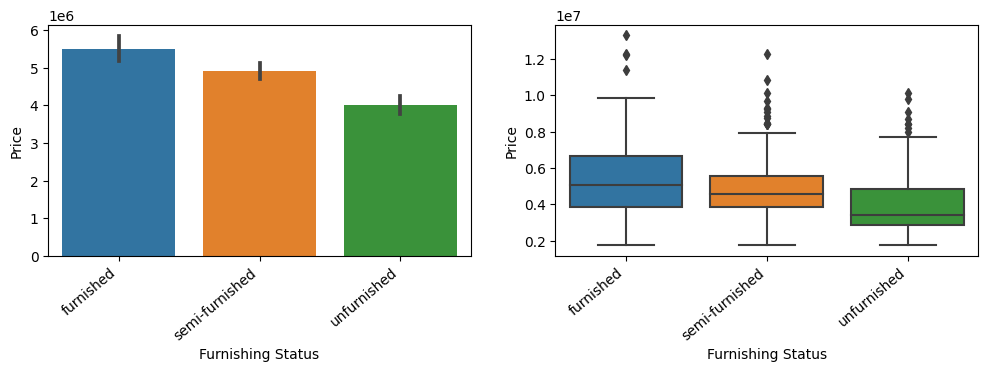

In [637]:
print(df.groupby("furnishingstatus")["price"].mean()) #So i want to know average price of each house with furnihed status
# Bar plot and box plot of 'price' vs. 'furnishingstatus'
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
ax=sns.barplot(x='furnishingstatus', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.subplot(1,2,2)
ax1=sns.boxplot(x='furnishingstatus', y='price', data=df)
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

- We can conclude that the prices are high for the houses which are furnished .

###Area and price columns

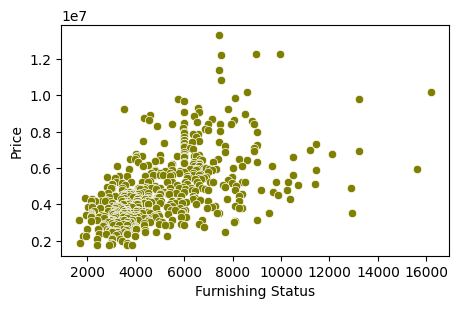

<Figure size 500x300 with 0 Axes>

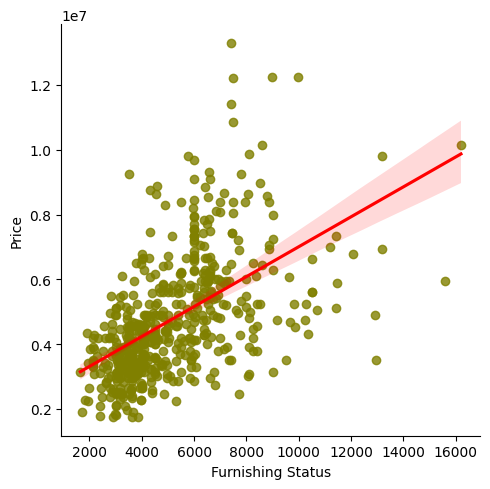

In [638]:
# Scatter plot & Lm plot of 'area' vs. 'price'
plt.figure(figsize=(5,3))
sns.scatterplot(x='area', y='price', data=df,color="olive")
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.figure(figsize=(5,3))
sns.lmplot(x='area', y='price', data=df,scatter_kws={"color":'olive'},line_kws={"color":'red'})
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

- We can see area and price columns are highly correlated to eachh other.
- area of the house increases the price is also increases

In [639]:
### Checking price of house againts guestrooms & aircondition status

No of total houses with Non_air_condition and with A/C
no     373
yes    172
Name: airconditioning, dtype: int64 airconditioning
no     4.191940e+06
yes    6.013221e+06
Name: price, dtype: float64


Text(0, 0.5, 'price Frequency')

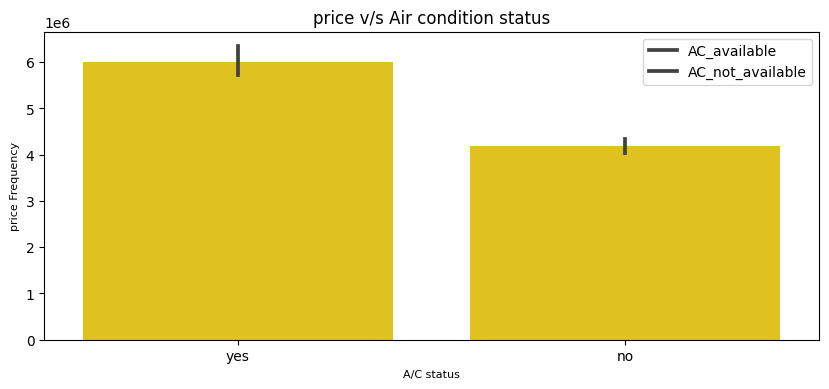

In [640]:
print("No of total houses with Non_air_condition and with A/C")
print(df['airconditioning'].value_counts(),end=" ")
print(df.groupby('airconditioning')["price"].mean()) #checking prices for each status
# histogram of the height - males and females
plt.figure(figsize=(10,4))
sns.barplot(x=df["airconditioning"],y=df["price"],color="gold")
plt.legend(labels=['AC_available','AC_not_available'])
plt.title('price v/s Air condition status', size=12)
plt.xlabel('A/C status', size=8)
plt.ylabel('price Frequency', size=8)

We can easily conclude that houses with A/c are more costly than which has no -A/C.

- So by visually we can not decide because most of the houses is non-A/C so oviously prices will be high if we take sum of them

### Combining three columns or more to understand more

<Figure size 1000x200 with 0 Axes>

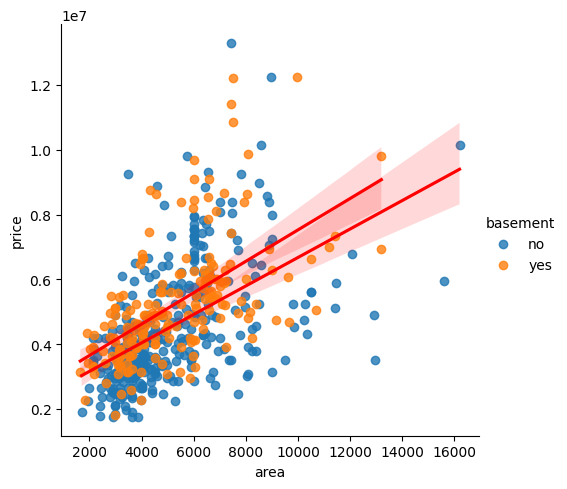

In [641]:
#So taking area, price and bathroom
plt.figure(figsize=(10,2))
sns.lmplot(data=df, x="area", y="price",hue="basement",line_kws={"color":'red'})

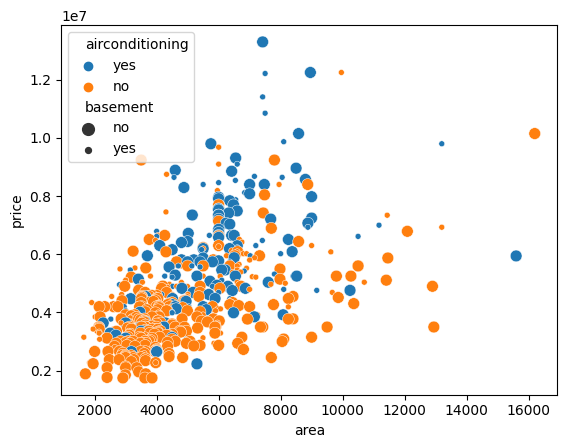

In [642]:
sns.scatterplot(data=df, x="area", y="price",hue="airconditioning",size="basement") #checking for four attrinutes
plt.show()

1. So we can conclude that all the attributes in the columns are so import to train the model

###Bedrooms v/s Perice

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64


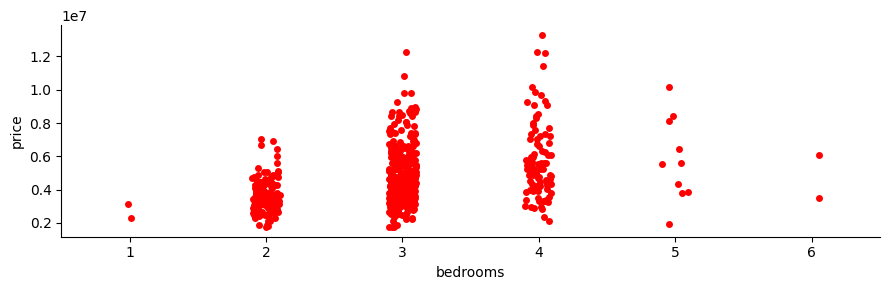

In [643]:
# bedrooms:
print(df.bedrooms.value_counts())
sns.catplot(x='bedrooms', y='price', data=df, height=3, aspect=3,color="red")

So yes , very less house in the dataset which has 6 & only 1 bedrooms

#Correlation

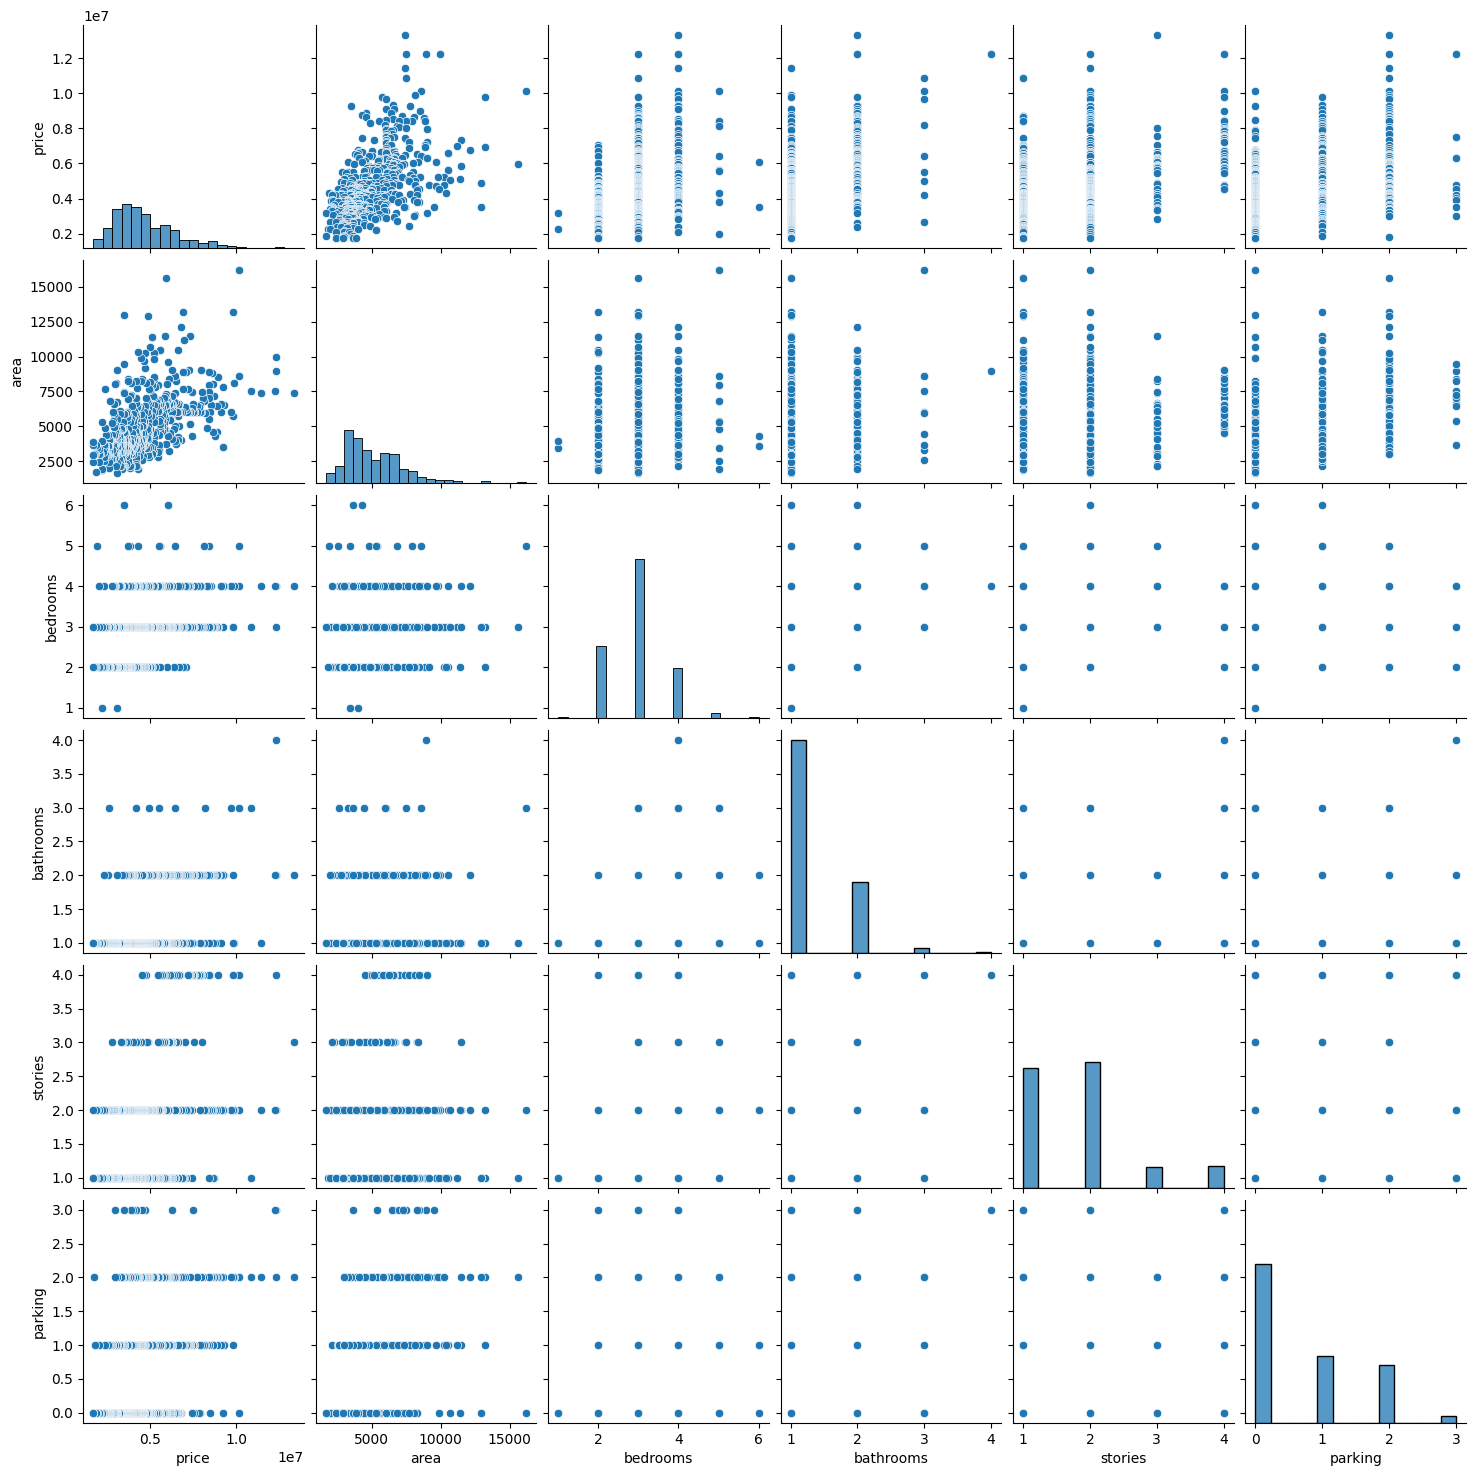

In [644]:
# pairplot allows us to plot pairwise relationships between variables within a dataset
sns.pairplot(df)
plt.show()

<ipython-input-645-987195810ff3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-645-987195810ff3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


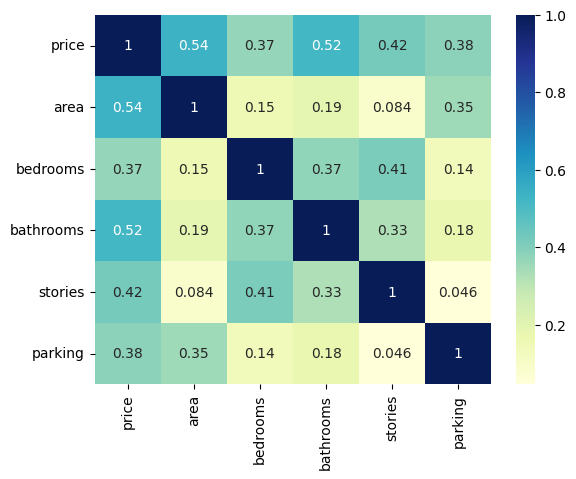

In [645]:
# they are ideal for the plot
print(df.corr())
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

Conclusion
1. So we cann see that price is strongly correlated to area more than other columns

**So this is all about EDA part now preparing the data for model building**

#Handling missing values & Duplicates

In [646]:
#missing values
print(df.isnull().sum())
print("-_______________________________________________There are no missing values in this data____________________________-")

#Checking duplicates
print("printing original",df.shape)
df.drop_duplicates(keep="first",inplace=True)
print("printing shape again ",df.shape)
print("-___________________________________In this data set no duplicates found as shape remains constant**_____________________-")

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
-_______________________________________________There are no missing values in this data____________________________-
printing original (545, 13)
printing shape again  (545, 13)
-___________________________________In this data set no duplicates found as shape remains constant**_____________________-


#Checking for outliers

-35000.0 9205000.0
________ So we can say lower threshold values is zero and the maximum possible threshhold is 92,05,000
________we can impute them by median value-_
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64') 15 15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 15
________Now it has no  outliers 


<Axes: xlabel='price'>

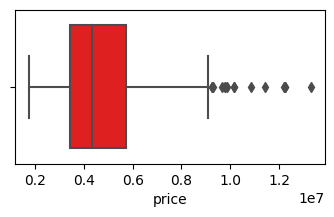

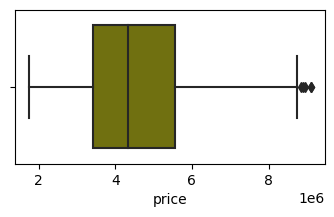

In [647]:
#for column price
plt.figure(figsize=(4,2))
sns.boxplot(x=df["price"],color="red")
#------- Finding minimum and maximum threshold to check wether data has outliers are not__________
# I am appling IQR method to obtain the outlier values.
first_quartile = df['price'].quantile(0.25)
third_quartile = df['price'].quantile(0.75)
#so
IQR = third_quartile - first_quartile
#our values are
lower_threshold = first_quartile - 1.5*IQR
upper_threshold = third_quartile + 1.5*IQR

print(lower_threshold,upper_threshold)
print("________ So we can say lower threshold values is zero and the maximum possible threshhold is 92,05,000")
#we can impute them with the median value of column price
print("________we can impute them by median value-_")
df_price_outlier = df[(df['price'] < lower_threshold ) | (df['price'] >= upper_threshold)]
outlier_index=df_price_outlier.index
print(outlier_index,len(outlier_index),len(df_price_outlier))
outlier_index = df_price_outlier.index.values
print(outlier_index,len(outlier_index))
#Subtituting extreme values with the median of column age
df.loc[outlier_index ,"price"] = df["price"].median() # Loc function to replacing values beyon 9205000 is the max threshold.
print("________Now it has no  outliers ")
plt.figure(figsize=(4,2))
sns.boxplot(x=df["price"],color="olive")

-540.0 10500.0
________ So we can say lower threshold values is zero and the maximum possible threshhold is 10,500
Int64Index([7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403], dtype='int64') 12 12
[  7  10  56  64  66  69 125 129 186 191 211 403] 12
________Now it has no  outliers 


<Axes: xlabel='area'>

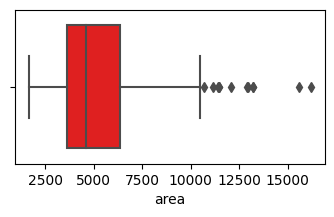

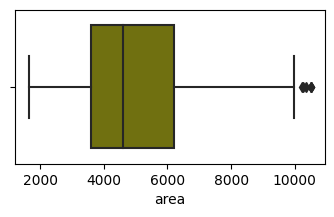

In [648]:
#for column area
plt.figure(figsize=(4,2))
sns.boxplot(x=df["area"],color="red")
first_quartile_area = df['area'].quantile(0.25)
third_quartile_area = df['area'].quantile(0.75)
IQR = third_quartile_area - first_quartile_area
lower_threshold = first_quartile_area - 1.5*IQR
upper_threshold = third_quartile_area + 1.5*IQR
print(lower_threshold,upper_threshold)
print("________ So we can say lower threshold values is zero and the maximum possible threshhold is 10,500")
df_area_outlier = df[(df['area'] < lower_threshold ) | (df['area'] > upper_threshold)]
outlier_index_area=df_area_outlier.index
print(outlier_index_area,len(outlier_index_area),len(df_area_outlier))
outlier_index_area_values= df_area_outlier.index.values
print(outlier_index_area_values,len(outlier_index_area_values))
df.loc[outlier_index_area_values,"area"] = df["area"].median()
print("________Now it has no  outliers ")
plt.figure(figsize=(4,2))
sns.boxplot(x=df["area"],color="olive")

**Bedrooms column**

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
the number of house with  1 bedroom & 6 bedrooms are very low these are the outliers 


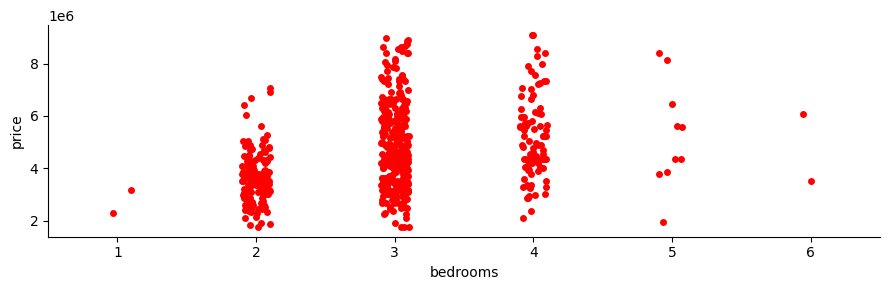

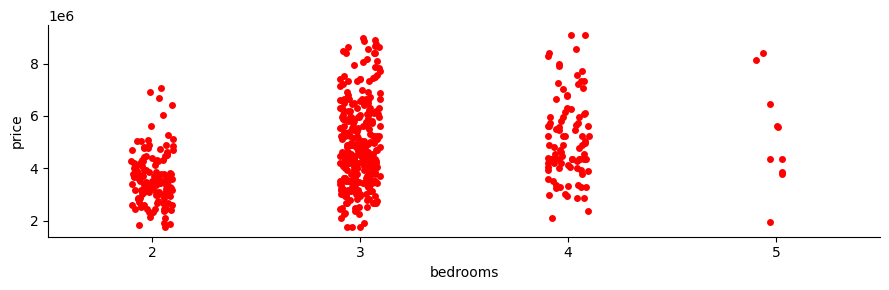

In [649]:
print(df.bedrooms.value_counts())
sns.catplot(x='bedrooms', y='price', data=df, height=3, aspect=3,color="red")
print("the number of house with  1 bedroom & 6 bedrooms are very low these are the outliers ")
df= df[df["bedrooms"]<6]
df= df[df["bedrooms"]>1]
sns.catplot(x='bedrooms', y='price', data=df, height=3, aspect=3,color="red")

In [650]:
print(df.bathrooms.value_counts())
print("the number of house with  4 bathrooms are just 1  ")
df= df[df["bathrooms"]<4]
print(df.bathrooms.value_counts())#So outliers removed for bathroom column

1    398
2    132
3     10
4      1
Name: bathrooms, dtype: int64
the number of house with  4 bathrooms are just 1  
1    398
2    132
3     10
Name: bathrooms, dtype: int64


In [651]:
print(df.stories.value_counts())


2    236
1    225
4     40
3     39
Name: stories, dtype: int64


Conclusion
1. Price columns  has Lower Thes -35000.0 ~ Max-Thres 9205000.0 So we can say lower threshold values is zero and the maximum possible threshhold is 92,05,00 and total number of outliers the price column has 15, imouted with median value.

2. Similerly i did for Area column ,outliers imputed with median.

3. For number of houses are very low with bedroom 1 and with bedrooms 6 so, removed them.
4. Similerly same for bathrooms just 1 house has 1 bathroom so removed.

#Feature Engineering & Encoding

###For categorical columns, Encoding>

In [652]:
List_of_categorical_columns=[['mainroad', 'guestroom', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus']] # we seprted early before
# we can assign every yes no 1 and 0 as they have  not any order
#we can do label encoding or we will asign vlues for column furnishingstatus as it has the order
#df["mainroad"]=df["mainroad"].apply({"yes":1,"no":0}.get)


#We can also aproach above method by .apply() but i am going with one hott encoding

df = pd.get_dummies(df, columns=['basement','mainroad', 'guestroom', 'hotwaterheating',
       'airconditioning', 'prefarea',"furnishingstatus"])

#df['furnishingstatus'].replace({'furnished':3, 'semi-furnished':2, 'unfurnished':1},inplace=True) #i have given the order to 1 to 3 as rank

In [653]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,basement_no,basement_yes,mainroad_no,mainroad_yes,...,guestroom_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4340000,7420,4,2,3,2,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
2,4340000,9960,3,2,2,2,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
3,4340000,7500,4,2,2,3,0,1,0,1,...,0,1,0,0,1,0,1,1,0,0
4,4340000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
5,4340000,7500,3,3,1,2,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


###Feature scaling
1. It ensure that all features are on a similar scale or magnitude. When working with a dataset, it is common for different features to have different scales or units of measurement. Failure to scale the data can lead to biased or inefficient model performance.

In [654]:
print(df["bedrooms"].skew())
print(df["bathrooms"].skew())
print(df["stories"].skew())
print(df["parking"].skew())

0.37440164814934496
1.4411999353006513
1.0808618428140098
0.830197920583334


0.7174288509560258


<Axes: xlabel='price', ylabel='Density'>

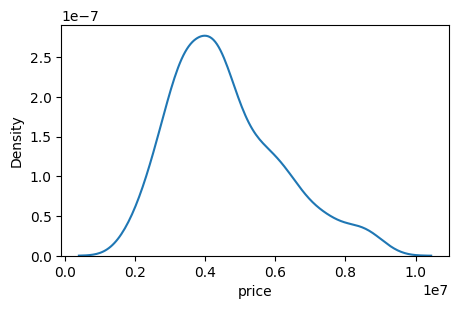

In [655]:
#checking skewness for the columns
print(df["price"].skew())
plt.figure(figsize=(5,3))
sns.kdeplot(x=df["price"]) #Kde plot for price

0.6943298291218547


<Axes: xlabel='area', ylabel='Density'>

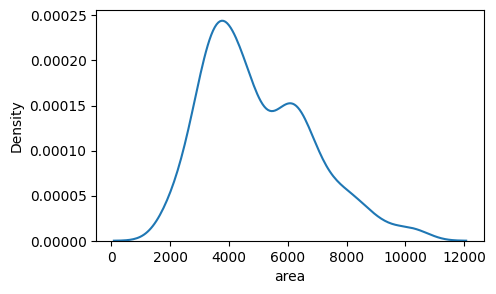

In [656]:
print(df["area"].skew())
plt.figure(figsize=(5,3))
sns.kdeplot(x=df["area"]) #Kde plot for area

1. So we can see the columns  Bathroom, stories parking are highly skewed so we will apply MinMax scaling and for Bedroom standard scaling as the skewness values are lies b/w -.5 to .5
2. Now these both columns are making Somewhere near to Gaussian curve but still skewed so we can apply MinMaxscaling instead of Standard scaling scaling

In [657]:
# Standardize "price","area","parking","stories","bathrooms" columns
scaler = MinMaxScaler()
df[["price","area","parking","stories","bathrooms"]] = scaler.fit_transform(df[["price","area","parking","stories","bathrooms"]])

In [658]:
# Standardize bedroom column
scaler = StandardScaler()
df[["bedrooms"]] = scaler.fit_transform(df[["bedrooms"]])

In [659]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,basement_no,basement_yes,mainroad_no,mainroad_yes,...,guestroom_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.352381,0.651977,1.474279,0.5,0.666667,0.666667,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
2,0.352381,0.938983,0.057712,0.5,0.333333,0.666667,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
3,0.352381,0.661017,1.474279,0.5,0.333333,1.000000,0,1,0,1,...,0,1,0,0,1,0,1,1,0,0
4,0.352381,0.651977,1.474279,0.0,0.333333,0.666667,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
5,0.352381,0.661017,0.057712,1.0,0.000000,0.666667,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


#Now data is ready for model building part

In [660]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

In [622]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

###Devinding the data in dependent and independent varriable

In [661]:
x=df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'basement_no', 'basement_yes', 'mainroad_no',
       'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes']] #independent variable.



y=df[["price"]]  #dependent variable.
print(x.shape,x.ndim,y.shape,y.ndim)

(540, 20) 2 (540, 1) 2


###Spliting data in two parts for train and test purpose

In [662]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

print("shape of X_train",X_train.shape)
print("shape of Y_train",Y_train.shape)
print("shape of X_test",X_test.shape)
print("shape of Y_test",Y_test.shape)
print("_______________So we can see that data is splited in 4 parts two for train and two for test with ratio of 75% & 25%")

shape of X_train (378, 20)
shape of Y_train (378, 1)
shape of X_test (162, 20)
shape of Y_test (162, 1)
_______________So we can see that data is splited in 4 parts two for train and two for test with ratio of 75% & 25%


###Model generation

In [663]:
#itentiating the model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [664]:
# get the slope and intercept of the line
print("intercept",model.intercept_)
print("intercept",model.coef_)

intercept [0.30278559]
intercept [[ 0.24211308  0.01063383  0.19344377  0.16703725  0.06151543  0.02489035
   0.01453859 -0.03942894 -0.02387282  0.02387282 -0.03623934  0.03623934
  -0.02667668  0.02667668 -0.06400128  0.06400128 -0.04908245  0.04908245
  -0.02396431  0.02396431]]


**And here is my model ready to predict**

### Lets predict

In [665]:
Y_pred=model.predict(X_test) # Predicting the var
print ("Type of the predicted object:", type(Y_pred))
print ("Size of the predicted object:", Y_pred.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (162, 1)


###Evaluation of Model

In [666]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,Y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean absolute error (MAE): 0.1015007706357671
Mean square error (MSE): 0.018787898829900247
Root mean square error (RMSE): 0.13706895647775336


Observations:
Mean Absolute Error (MAE), Mean Square Error (MSE), and Root Mean Square Error (RMSE) are common metrics used to evaluate the performance of regression models. They provide a measure of how well the model's predictions match the actual values in the dataset. Lower values of these metrics indicate better model performance.

Given the values you provided:

Mean Absolute Error (MAE) = 0.1015007706357671
Mean Square Error (MSE) = 0.018787898829900247
Root Mean Square Error (RMSE) = 0.13706895647775336

Here's what each of these metrics means:
Conclusion, based on the provided values, the model seems to have performed quite well, as all the error metrics (MAE, MSE, and RMSE) have relatively low values. However, it's important to consider the context of the problem and compare these values to alternative models or benchmarks to fully assess the model's performance.

In [670]:
print("R-squared value of predictions:",round(metrics.r2_score(Y_test,Y_pred),3))

R-squared value of predictions: 0.554


The R-squared value, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. It ranges from 0 to 1, where:

- R-squared = 0 indicates that the model explains none of the variance in the dependent variable.
- R-squared = 1 indicates that the model explains all the variance in the dependent variable.

In this case, the R-squared value of predictions is 0.554, which means that approximately 55.4% of the variance in the dependent variable can be explained by the independent variables used in the regression model. The remaining 44.6% of the variance is unexplained and might be attributed to other factors or randomness.

###Comparing actual and predicted values

In [668]:
df_check = pd.DataFrame({'Actual': Y_test['price'][:10].values, 'Predicted': Y_pred[:10].ravel()})
df_check

,Actual,Predicted
0,0.676190,0.517937
1,0.238095,0.198095
2,0.123810,0.160033
3,0.390476,0.504533
4,0.523810,0.596662
5,0.190476,0.319248
6,0.123810,0.396777
7,0.380952,0.265314
8,0.247619,0.167358
9,0.376190,0.391184


###Residuals

Residuals are the differences between the actual values (observed values) and the predicted values from a regression model. In other words, they represent the errors or the vertical distances between the data points and the regression line (or the model's predictions).

Mathematically, the residual for each data point (i) can be calculated as:

Residual(i) = Actual Value(i) - Predicted Value(i)

Text(21.727180555555556, 0.5, 'count')

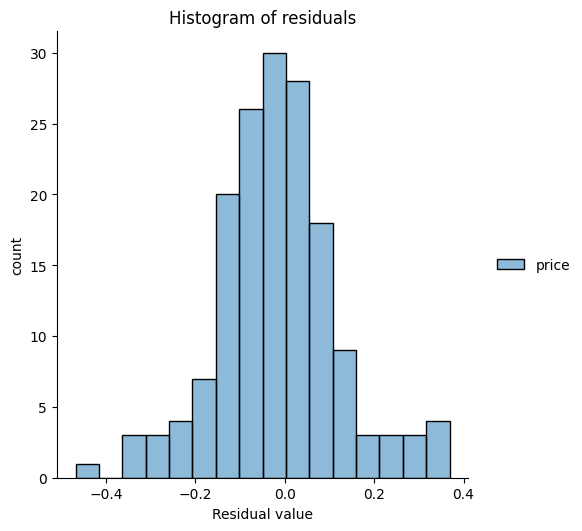

In [671]:
 ## first compute vector of residuals.
resids = np.subtract(Y_test, Y_pred)
## now make the residual plots
sns.displot(resids)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')